### Objective:
Developed a predictive model to optimize the manufacturing process for a modern Ultrasound systemby reducing testing points from over 550 to at least 140.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import os
os.getcwd()

'C:\\Users\\manas\\Downloads\\ML\\Project session by mithlesh sir'

In [3]:
mfg_data = pd.read_csv('Ultrasound.csv')
pd.set_option('display.max_columns',600)
mfg_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

##### Observation:
- Column Pass/Fail is our target variable and remaining features are our independent variable

### EDA

##### Creating a copy of the dataset

In [4]:
mfg_data_n = mfg_data.copy()

##### Shape of the data

In [5]:
mfg_data_n.shape

# 1577 nos. of rows & 577 nos. of columns

(1577, 577)

##### Observations:
- Need to reduce the features from 576 nos. to at-least 140 nos.
- 1 cloumn is target variable

##### Basic information about the data

In [6]:
mfg_data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


##### Number of unique values in target variable

In [7]:
mfg_data_n['Pass/Fail'].value_counts()
# 1 indiactes fail & -1 indicates pass

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [8]:
# renaming it for better understanding 
mfg_data_n['Pass/Fail'] = mfg_data['Pass/Fail'].map({-1:0, 1:1})
mfg_data_n['Pass/Fail'].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

##### Observation:
- Total no. of equipments detected as fail - 105 nos.
- Dataset is highly imbalanced

##### Handling duplicates

In [9]:
mfg_data_n.duplicated().sum()
# No duplicate values found

0

##### Handling null values

In [10]:
print('Total no. of missing values :', mfg_data_n.isnull().sum().sum(), 'nos.')

Total no. of missing values : 42093 nos.


In [11]:
# Replacing all the Nan values with 0
mfg_data_n = mfg_data_n.replace(np.NaN, 0)
mfg_data_n.isnull().sum().sum()

0

##### Statistical measures

In [12]:
mfg_data_n.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1

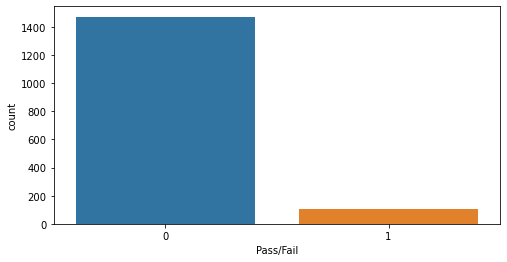

In [13]:
# department wise monthly income
plt.figure(figsize = (8,4))
sns.countplot(x = 'Pass/Fail',data = mfg_data_n)
plt.show()

##### Observation:
- Total 105 nos. of Ultrasonic intrusments failed is testing process
- It also indicates that target value is highly imbalance

### Defining The Independent and Dependent Variables

In [14]:
x_var = mfg_data_n.drop(['Pass/Fail'],axis = 1)
y_var = mfg_data_n['Pass/Fail']

In [15]:
print('Shape of independent variables:',x_var.shape)
print('Shape of target variable:',y_var.shape)

Shape of independent variables: (1577, 576)
Shape of target variable: (1577,)


### Training The Data Set

In [16]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x_var,y_var,test_size = 0.2, random_state = 42,stratify=y_var)

In [17]:
X_train_copy = X_train.copy()
x_test_copy = x_test.copy()

### Model Building & Verifying The Recall (Imbalanced data)

#### Model 1  : Logistic Regression

In [18]:
# Scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)   
x_test = ss.transform(x_test)

In [19]:
# fitting & predicting the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [20]:
# predecting the output
Y_t_predict = lr.predict(X_train)
y_predict = lr.predict(x_test)

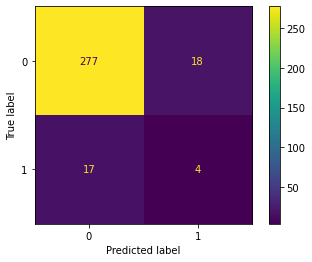

In [21]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(lr,x_test,y_test)

In [22]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       295
           1       0.18      0.19      0.19        21

    accuracy                           0.89       316
   macro avg       0.56      0.56      0.56       316
weighted avg       0.89      0.89      0.89       316



#### Model 2  : Decision Tree 

In [23]:
# Hypertuning
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8,12,16],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'random_state' : [0,1,34,43,42]}

# Hyptuned_model = GridSearchCV(Dt,cv = 5, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train, Y_train)

In [24]:
# Hyptuned_model.best_params_

In [25]:
Dt.set_params(criterion ='entropy',
max_depth = 12,
max_features = 'log2',
random_state = 43)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='log2',
                       random_state=43)

In [26]:
# Fitting the model
Dt.fit(X_train,Y_train)

# Predection
Y_t_predict = Dt.predict(X_train)
y_predict = Dt.predict(x_test)

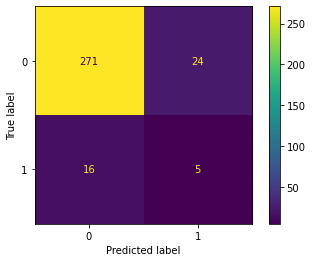

In [27]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(Dt,x_test, y_test)
confusion_mat

In [28]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       295
           1       0.17      0.24      0.20        21

    accuracy                           0.87       316
   macro avg       0.56      0.58      0.57       316
weighted avg       0.89      0.87      0.88       316



#### Model 3 : Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier() 

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'bootstrap' : [True, False],
#               'random_state' : [0,1,43,65]}

# Hyptuned_model = GridSearchCV(Rf,cv = 5, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train, Y_train)

In [30]:
# Hyptuned_model.best_params_

In [31]:
Rf.set_params(bootstrap = True,
 criterion ='entropy',
 max_depth = 12,
 max_features = 'auto',
 random_state = 0,
 class_weight = {1: 100, 0:0.89})

RandomForestClassifier(class_weight={0: 0.89, 1: 100}, criterion='entropy',
                       max_depth=12, random_state=0)

In [32]:
Rf.fit(X_train,Y_train)

# Predicting the output
Y_t_predict = Rf.predict(X_train)
y_predict = Rf.predict(x_test)

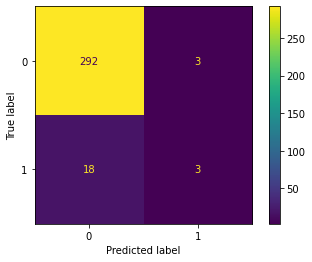

In [33]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(Rf,x_test,y_test)

In [34]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       295
           1       0.50      0.14      0.22        21

    accuracy                           0.93       316
   macro avg       0.72      0.57      0.59       316
weighted avg       0.91      0.93      0.92       316



#### Model 4 : Bagging classifier using decision tree

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 18), random_state = 1,bootstrap=False,n_jobs=-1)
bagging_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=18,
                                                        random_state=42),
                  bootstrap=False, n_jobs=-1, random_state=1)

In [37]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train)
y_predict = bagging_clf.predict(x_test)

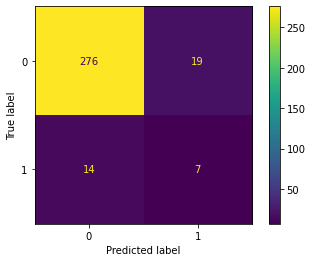

In [38]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test,y_test)

In [39]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       295
           1       0.27      0.33      0.30        21

    accuracy                           0.90       316
   macro avg       0.61      0.63      0.62       316
weighted avg       0.91      0.90      0.90       316



#### Model 5 : Bagging classifier using Naive Bayes

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB      

In [41]:
bagging_clf = BaggingClassifier(GaussianNB())
bagging_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [42]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train)
y_predict = bagging_clf.predict(x_test)

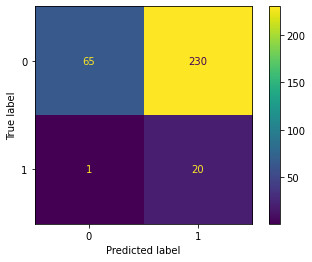

In [43]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test,y_test)

In [44]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.98      0.22      0.36       295
           1       0.08      0.95      0.15        21

    accuracy                           0.27       316
   macro avg       0.53      0.59      0.25       316
weighted avg       0.92      0.27      0.35       316



#### Model 6 : AdaBoost Classifier using DT

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 25),random_state=500)
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25),
                   random_state=500)

In [47]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train)
y_predict = adaboost_clf.predict(x_test)

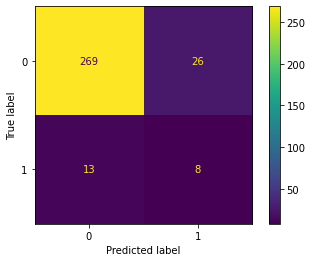

In [48]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test,y_test)

In [49]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       295
           1       0.24      0.38      0.29        21

    accuracy                           0.88       316
   macro avg       0.59      0.65      0.61       316
weighted avg       0.91      0.88      0.89       316



#### Model 7 : AdaBoost Classifier using Naive Bayes

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
adaboost_clf = AdaBoostClassifier(GaussianNB())
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB())

In [52]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train)
y_predict = adaboost_clf.predict(x_test)

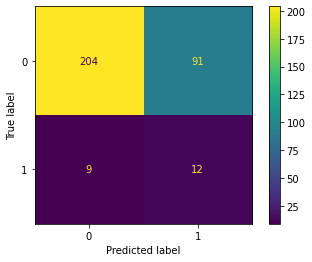

In [53]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test,y_test)

In [54]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       295
           1       0.12      0.57      0.19        21

    accuracy                           0.68       316
   macro avg       0.54      0.63      0.50       316
weighted avg       0.90      0.68      0.76       316



#### Model 8 : Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 12, random_state = 101,learning_rate=0.01)
gbrt.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=12, random_state=101)

In [56]:
# Predicting the output
Y_t_predict = gbrt.predict(X_train)
y_predict = gbrt.predict(x_test)

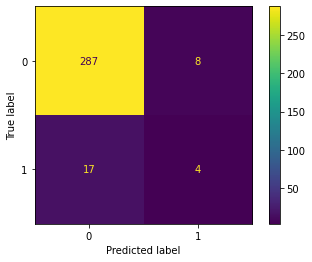

In [57]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(gbrt,x_test,y_test)

In [58]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       295
           1       0.33      0.19      0.24        21

    accuracy                           0.92       316
   macro avg       0.64      0.58      0.60       316
weighted avg       0.90      0.92      0.91       316



#### Model 9 :  XGBoost

In [59]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01,max_depth=15)
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [60]:
# Predicting the output
Y_t_predict = model_xgb.predict(X_train)
y_predict = model_xgb.predict(x_test)

In [61]:
Train_accuracy=model_xgb.score(X_train,Y_train)
Test_accuracy=model_xgb.score(x_test,y_test)

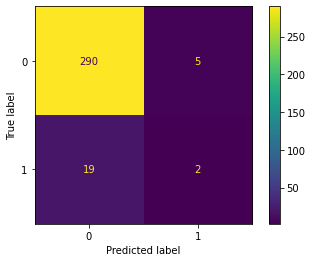

In [62]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model_xgb,x_test,y_test)

In [63]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.29      0.10      0.14        21

    accuracy                           0.92       316
   macro avg       0.61      0.54      0.55       316
weighted avg       0.90      0.92      0.91       316



#### Model 10 : LightGBM

In [64]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.01, class_weight = {1:100,0:0.89}, n_estimators = 100,boosting_type = 'gbdt')
model.fit(X_train, Y_train)

LGBMClassifier(class_weight={0: 0.89, 1: 100}, learning_rate=0.01)

In [65]:
# Predicting the output
Y_t_predict = model.predict(X_train)
y_predict = model.predict(x_test)

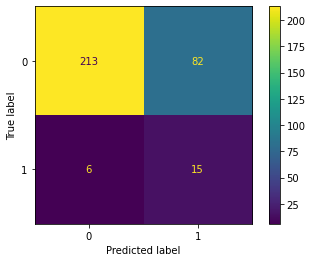

In [66]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model,x_test,y_test)

In [67]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       295
           1       0.15      0.71      0.25        21

    accuracy                           0.72       316
   macro avg       0.56      0.72      0.54       316
weighted avg       0.92      0.72      0.79       316



#### Model 11 :  Naive Bayes 

In [68]:
from sklearn.naive_bayes import GaussianNB      
Gb = GaussianNB()
Gb.fit(X_train, Y_train) # Training the model
Y_t_predict = Gb.predict(X_train) # Predicting the Output 
y_predict = Gb.predict(x_test)

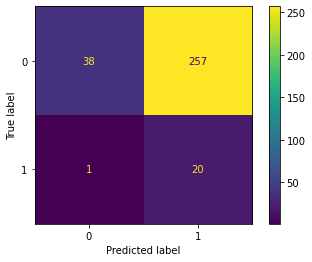

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Gb, x_test, y_test)

In [70]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.13      0.23       295
           1       0.07      0.95      0.13        21

    accuracy                           0.18       316
   macro avg       0.52      0.54      0.18       316
weighted avg       0.91      0.18      0.22       316



### Feature Selection

#### A) VarianceThreshold

In [71]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)  
var_thres = var_thres.fit(X_train)

In [72]:
constant_columns = [i for i in X_train_copy.columns 
                   if i not in X_train_copy.columns[var_thres.get_support()]]

In [73]:
X_train = X_train_copy.drop(constant_columns, axis = 1)
x_test = x_test_copy.drop(constant_columns, axis = 1)

In [74]:
X_train.shape, x_test.shape

((1261, 474), (316, 474))

In [75]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=474)

### Model Building & Verifying The Recall (Imbalanced data)
- verifying recall with reduced features on imbalanced dataset

#### Model 1  : Decision Tree 

In [76]:
# Hypertuning
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8,16],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'random_state' : [0,1,34,43,42]}

# Hyptuned_model = GridSearchCV(Dt,cv = 10, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train, Y_train)

In [77]:
# Hyptuned_model.best_params_

In [78]:
Dt.set_params(criterion ='gini',
max_depth = 15,
max_features = 'log2',
random_state = 1)

DecisionTreeClassifier(max_depth=15, max_features='log2', random_state=1)

In [79]:
Dt.fit(X_train,Y_train) # Fitting the model
Y_t_predict = Dt.predict(X_train) # Predecting Y_train
y_predict = Dt.predict(x_test) # Predecting Y_train

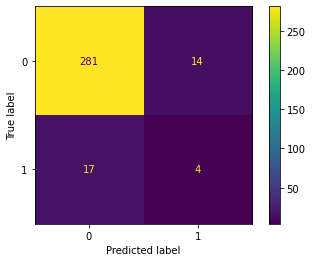

In [80]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(Dt,x_test, y_test)
confusion_mat

In [81]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       295
           1       0.22      0.19      0.21        21

    accuracy                           0.90       316
   macro avg       0.58      0.57      0.58       316
weighted avg       0.90      0.90      0.90       316



#### Model 2  : Bagging classifier using decision tree

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 18), random_state = 1,bootstrap=False,n_jobs=-1)
bagging_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=18,
                                                        random_state=42),
                  bootstrap=False, n_jobs=-1, random_state=1)

In [84]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train)
y_predict = bagging_clf.predict(x_test)

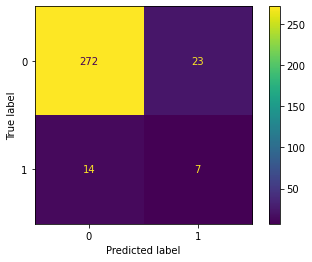

In [85]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test,y_test)

In [86]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       295
           1       0.23      0.33      0.27        21

    accuracy                           0.88       316
   macro avg       0.59      0.63      0.61       316
weighted avg       0.90      0.88      0.89       316



#### Model 3  : Bagging classifier using Naive Bayes

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB      

In [88]:
bagging_clf = BaggingClassifier(GaussianNB())
bagging_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [89]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train)
y_predict = bagging_clf.predict(x_test)

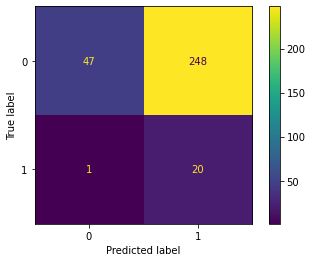

In [90]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test,y_test)

In [91]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.98      0.16      0.27       295
           1       0.07      0.95      0.14        21

    accuracy                           0.21       316
   macro avg       0.53      0.56      0.21       316
weighted avg       0.92      0.21      0.27       316



#### Model 4  : AdaBoost Classifier using DT

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 30),random_state=18)
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30),
                   random_state=18)

In [94]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train)
y_predict = adaboost_clf.predict(x_test)

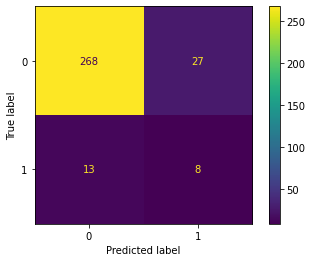

In [95]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test,y_test)

In [96]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       295
           1       0.23      0.38      0.29        21

    accuracy                           0.87       316
   macro avg       0.59      0.64      0.61       316
weighted avg       0.91      0.87      0.89       316



#### Model 5  : AdaBoost Classifier using Naive Bayes

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
adaboost_clf = AdaBoostClassifier(GaussianNB(),n_estimators=120,
    learning_rate=0.01,
    algorithm='SAMME.R')
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.01,
                   n_estimators=120)

In [99]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train)
y_predict = adaboost_clf.predict(x_test)

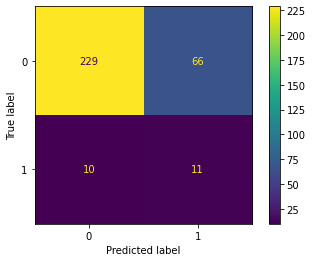

In [100]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test,y_test)

In [101]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       295
           1       0.14      0.52      0.22        21

    accuracy                           0.76       316
   macro avg       0.55      0.65      0.54       316
weighted avg       0.90      0.76      0.82       316



#### Model 6  : Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 12, random_state = 101,learning_rate=0.01)
gbrt.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=12, random_state=101)

In [103]:
# Predicting the output
Y_t_predict = gbrt.predict(X_train)
y_predict = gbrt.predict(x_test)

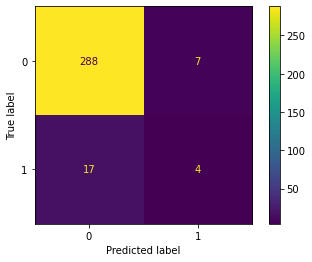

In [104]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(gbrt,x_test,y_test)

In [105]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.36      0.19      0.25        21

    accuracy                           0.92       316
   macro avg       0.65      0.58      0.60       316
weighted avg       0.91      0.92      0.91       316



#### Model 7  : LightGBM

In [106]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.01, class_weight = {1:120,0:0.89}, n_estimators = 100
                           ,boosting_type = 'gbdt')
model.fit(X_train, Y_train)

LGBMClassifier(class_weight={0: 0.89, 1: 120}, learning_rate=0.01)

In [107]:
# Predicting the output
Y_t_predict = model.predict(X_train)
y_predict = model.predict(x_test)

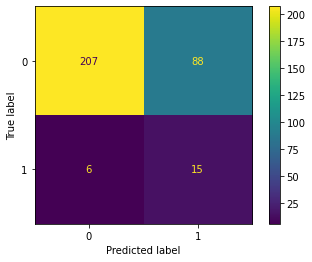

In [108]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model,x_test,y_test)

In [109]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       295
           1       0.15      0.71      0.24        21

    accuracy                           0.70       316
   macro avg       0.56      0.71      0.53       316
weighted avg       0.92      0.70      0.78       316



#### Model 8  :  Naive Bayes 

In [110]:
from sklearn.naive_bayes import GaussianNB      
Gb = GaussianNB()
Gb.fit(X_train, Y_train) # Training the model
Y_t_predict = Gb.predict(X_train) # Predicting the Output 
y_predict = Gb.predict(x_test)

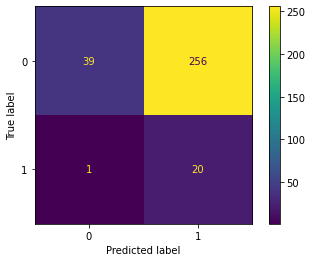

In [111]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Gb, x_test, y_test)

In [112]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.13      0.23       295
           1       0.07      0.95      0.13        21

    accuracy                           0.19       316
   macro avg       0.52      0.54      0.18       316
weighted avg       0.92      0.19      0.23       316



### Feature Selection

#### B) Removing Correlated Features

In [113]:
X_train.shape

(1261, 474)

In [114]:
# X_train = pd.DataFrame(X_train,columns = X_train_copy.columns)
# x_test = pd.DataFrame(x_test,columns = x_test_copy.columns) 

In [115]:
corr_matrix = X_train.corr()

<AxesSubplot:>

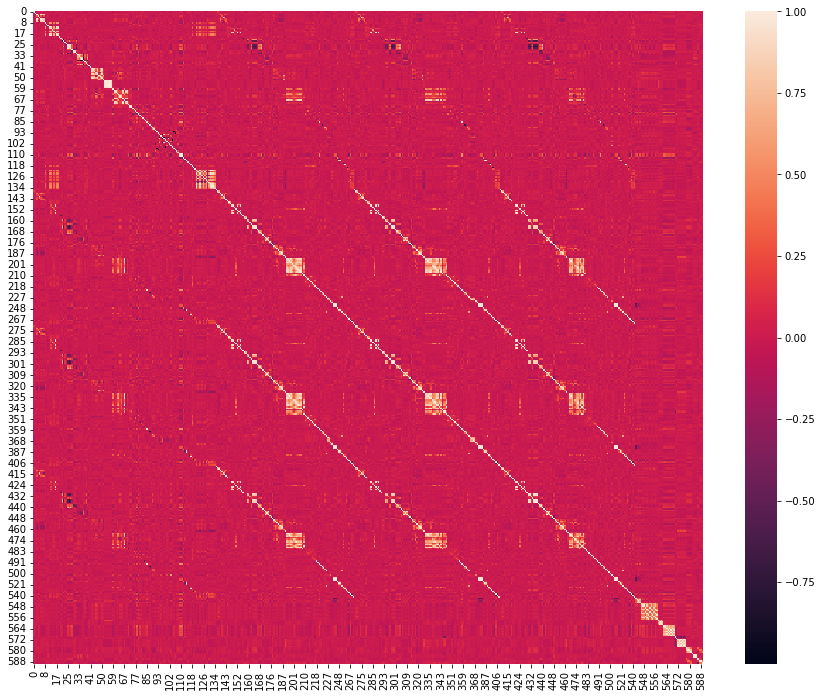

In [116]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix)

In [117]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [118]:
corr_features = correlation(X_train,0.9)
len(set(corr_features))

228

In [119]:
X_train = X_train.drop(corr_features,axis = 1)
x_test = x_test.drop(corr_features,axis = 1)

In [120]:
X_train.shape, x_test.shape

((1261, 246), (316, 246))

#### C) Removing Multicolenarity

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm # required for adding a constant
X_T =sm.add_constant(X_train)

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['feature'] = X_T.columns
VIF['VIF']     = [variance_inflation_factor(X_T.values, i) for i in range(X_T.shape[1])]
VIF = VIF.set_index('feature')

In [122]:
VIF.head()

,VIF
feature,
const,265414.859692
0,1.342262
1,1.280122
2,16.872548
3,8.893992


In [123]:
VIF = VIF.drop('const')

In [124]:
# features having VIF above 10
high_vif = VIF[VIF['VIF']>10].sort_values(by = 'VIF')

In [125]:
X_train = X_train.drop(high_vif.index, axis = 1)
x_test = x_test.drop(high_vif.index, axis = 1)

In [126]:
X_train.shape, x_test.shape

((1261, 188), (316, 188))

### Model Building & Verifying The Recall
- verifying recall with reduced features (i.e 188 nos.) on imbalanced dataset

#### Model 1  : Decision Tree

In [127]:
# Hypertuning
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8,16],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'random_state' : [0,1,34,43,42]}

# Hyptuned_model = GridSearchCV(Dt,cv = 10, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train, Y_train)

In [128]:
# Hyptuned_model.best_params_

In [129]:
Dt.set_params(criterion ='gini',
max_depth = 15,
max_features = 'auto',
random_state = 0)

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=0)

In [130]:
Dt.fit(X_train,Y_train) # Fitting the model
Y_t_predict = Dt.predict(X_train) # Predecting Y_train
y_predict = Dt.predict(x_test) # Predecting Y_train

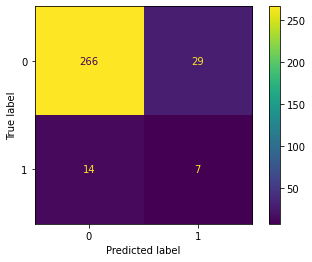

In [131]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(Dt,x_test, y_test)
confusion_mat
plt.show()

In [132]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       295
           1       0.19      0.33      0.25        21

    accuracy                           0.86       316
   macro avg       0.57      0.62      0.59       316
weighted avg       0.90      0.86      0.88       316



#### Model 2  : Bagging classifier using decision tree

In [133]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [134]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 15), random_state = 1,bootstrap=False,n_jobs=-1)
bagging_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        random_state=42),
                  bootstrap=False, n_jobs=-1, random_state=1)

In [135]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train)
y_predict = bagging_clf.predict(x_test)

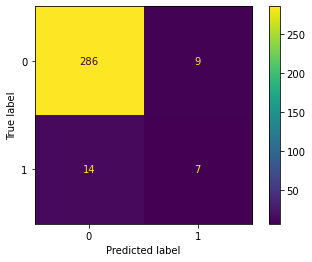

In [136]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test,y_test)

In [137]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       295
           1       0.44      0.33      0.38        21

    accuracy                           0.93       316
   macro avg       0.70      0.65      0.67       316
weighted avg       0.92      0.93      0.92       316



#### Model 3  : Bagging classifier using Naive Bayes

In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB      

In [139]:
bagging_clf = BaggingClassifier(GaussianNB(),bootstrap = True, random_state = 7)
bagging_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GaussianNB(), random_state=7)

In [140]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train)
y_predict = bagging_clf.predict(x_test)

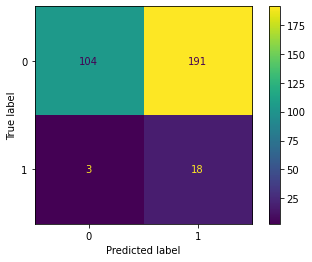

In [141]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test,y_test)

In [142]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.35      0.52       295
           1       0.09      0.86      0.16        21

    accuracy                           0.39       316
   macro avg       0.53      0.60      0.34       316
weighted avg       0.91      0.39      0.49       316



#### Model 4  : AdaBoost Classifier using DT

In [143]:
from sklearn.ensemble import AdaBoostClassifier

In [144]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 30),random_state=18)
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30),
                   random_state=18)

In [145]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train)
y_predict = adaboost_clf.predict(x_test)

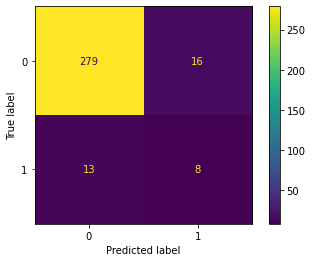

In [146]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test,y_test)

In [147]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       295
           1       0.33      0.38      0.36        21

    accuracy                           0.91       316
   macro avg       0.64      0.66      0.65       316
weighted avg       0.91      0.91      0.91       316



#### Model 5  : AdaBoost Classifier using Naive Bayes

In [148]:
from sklearn.ensemble import AdaBoostClassifier

In [149]:
adaboost_clf = AdaBoostClassifier(GaussianNB(),n_estimators=100,learning_rate=0.01,algorithm='SAMME.R')
adaboost_clf.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.01,
                   n_estimators=100)

In [150]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train)
y_predict = adaboost_clf.predict(x_test)

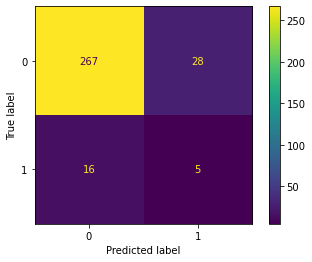

In [151]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test,y_test)

In [152]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       295
           1       0.15      0.24      0.19        21

    accuracy                           0.86       316
   macro avg       0.55      0.57      0.55       316
weighted avg       0.89      0.86      0.87       316



#### Model 6  : Gradient Boosting

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 15, random_state = 101,learning_rate=1)
gbrt.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=15, random_state=101)

In [154]:
# Predicting the output
Y_t_predict = gbrt.predict(X_train)
y_predict = gbrt.predict(x_test)

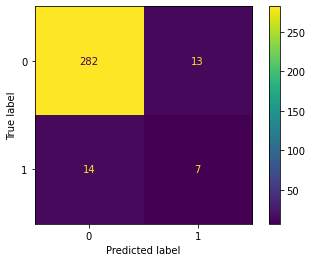

In [155]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(gbrt,x_test,y_test)

In [156]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       295
           1       0.35      0.33      0.34        21

    accuracy                           0.91       316
   macro avg       0.65      0.64      0.65       316
weighted avg       0.91      0.91      0.91       316



#### Model 7  : LightGBM  

In [157]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.0121, class_weight = {1:120,0:0.89}, n_estimators = 110
                           ,boosting_type = 'gbdt')
model.fit(X_train, Y_train)

LGBMClassifier(class_weight={0: 0.89, 1: 120}, learning_rate=0.0121,
               n_estimators=110)

In [158]:
# Predicting the output
Y_t_predict = model.predict(X_train)
y_predict = model.predict(x_test)

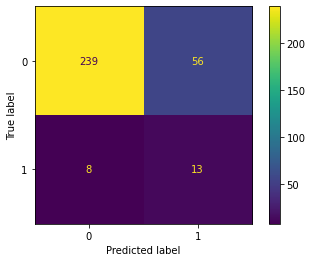

In [159]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model,x_test,y_test)

In [160]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       295
           1       0.19      0.62      0.29        21

    accuracy                           0.80       316
   macro avg       0.58      0.71      0.59       316
weighted avg       0.92      0.80      0.84       316



#### Model 8 : Naive Bayes 

In [161]:
from sklearn.naive_bayes import GaussianNB      
Gb = GaussianNB()
Gb.fit(X_train, Y_train) # Training the model
Y_t_predict = Gb.predict(X_train) # Predicting the Output 
y_predict = Gb.predict(x_test)

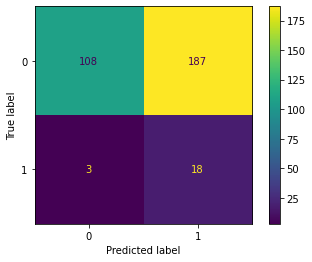

In [162]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Gb, x_test, y_test)

In [163]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.37      0.53       295
           1       0.09      0.86      0.16        21

    accuracy                           0.40       316
   macro avg       0.53      0.61      0.35       316
weighted avg       0.91      0.40      0.51       316



### Feature Selection - option 1

##### D) Forward Feature selection

In [164]:
X_train.shape

(1261, 188)

##### Forward Feature selection by using Naive bayes

In [165]:
from mlxtend.feature_selection import SequentialFeatureSelector
SFS = SequentialFeatureSelector(GaussianNB(),cv = 10, verbose = 2, n_jobs = -1, forward = True, k_features = (1,188), floating = False, scoring = 'recall')
SFS.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 165 out of 188 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 188 out of 188 | elapsed:    3.5s finished

[2023-02-16 15:17:21] Features: 1/188 -- score: 0.9777777777777779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 164 out of 187 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 187 out of 187 | elapsed:    1.1s finished

[2023-02-16 15:17:23] Features: 2/188 -- score: 0.9777777777777779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 163 out of 186 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed:    1.0s fi

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 163 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 163 out of 163 | elapsed:    1.4s finished

[2023-02-16 15:18:03] Features: 26/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    1.5s finished

[2023-02-16 15:18:05] Features: 27/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 138 out of 161 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    1.5s finished

[2023-02-16 15:18:06] Features: 28/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Par


[2023-02-16 15:18:46] Features: 51/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 114 out of 137 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:    1.5s finished

[2023-02-16 15:18:47] Features: 52/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 113 out of 136 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    1.4s finished

[2023-02-16 15:18:49] Features: 53/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    1.3s remaining:   

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    1.7s finished

[2023-02-16 15:19:31] Features: 76/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  89 out of 112 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    1.6s finished

[2023-02-16 15:19:32] Features: 77/188 -- score: 0.9888888888888889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  88 out of 111 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 111 out of 111 | elapsed:    1.7s finished

[2023-02-16 15:19:34] Features: 78/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1

[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    1.5s finished

[2023-02-16 15:20:20] Features: 103/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    1.5s finished

[2023-02-16 15:20:22] Features: 104/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    1.5s finished

[2023-02-16 15:20:23] Features: 105/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  83 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:    1.4s finished

[2023-02-16 15:20:25] Features: 106/188 -- score: 1.0[P

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.2s finished

[2023-02-16 15:21:12] Features: 134/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.2s finished

[2023-02-16 15:21:13] Features: 135/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.3s finished

[2023-02-16 15:21:14] Features: 136/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.2s finished

[2023-02-16 15:21:16] Features: 137/188 -- score: 1.0[Parallel(n_jobs=-1)]

[Parallel(n_jobs=-1)]: Done  17 out of  26 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.7s finished

[2023-02-16 15:21:45] Features: 163/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2023-02-16 15:21:46] Features: 164/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished

[2023-02-16 15:21:47] Features: 165/188 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.6s finished

SequentialFeatureSelector(cv=10, estimator=GaussianNB(), k_features=(1, 188),
                          n_jobs=-1, scoring='recall', verbose=2)

In [166]:
selected_features = np.array(SFS.k_feature_names_)
selected_features

array(['0', '1', '3', '4', '8', '9', '10', '11', '12', '15', '20', '21',
       '22', '23', '24', '28', '29', '32', '33', '35', '37', '38', '40',
       '41', '47', '59', '71', '72', '75', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '91', '92', '93',
       '95', '99', '100', '102', '103', '107', '108', '109', '112', '113',
       '114', '115', '116', '117', '118', '119', '120', '125', '126',
       '130', '134', '136', '137', '138', '142', '143', '144', '145',
       '146', '151', '153', '155', '162'], dtype='<U3')

In [167]:
X_train_n = SFS.transform(X_train)
x_test_n = SFS.transform(x_test)

In [168]:
X_train_n.shape, x_test_n.shape

((1261, 78), (316, 78))

### Model Building & Verifying The Recall
- Verifying recall with reduced features on imbalanced dataset and handling imbalance dataset
- Selected features 78 nos.

#### Model 1 : Decision Tree

In [217]:
# Hypertuning
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8,16],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'random_state' : [0,1,34,43,42]}

# Hyptuned_model = GridSearchCV(Dt,cv = 10, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train_n, Y_train)

In [218]:
# Hyptuned_model.best_params_

In [219]:
Dt.set_params(criterion ='entropy',
max_depth = 18,
max_features = 'auto',
random_state = 1,)
# class_weight = {1:150, 0:0.89})

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='auto',
                       random_state=1)

In [220]:
Dt.fit(X_train_n,Y_train) # Fitting the model
Y_t_predict = Dt.predict(X_train_n) # Predecting Y_train
y_predict = Dt.predict(x_test_n) # Predecting Y_train

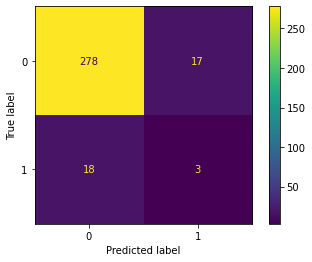

In [221]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(Dt,x_test_n, y_test)
confusion_mat
plt.show()

In [222]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       295
           1       0.15      0.14      0.15        21

    accuracy                           0.89       316
   macro avg       0.54      0.54      0.54       316
weighted avg       0.89      0.89      0.89       316



#### Model 2 : Bagging classifier using decision tree

In [223]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [224]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 15), random_state = 1,bootstrap=False,n_jobs=-1)
bagging_clf.fit(X_train_n,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        random_state=42),
                  bootstrap=False, n_jobs=-1, random_state=1)

In [225]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train_n)
y_predict = bagging_clf.predict(x_test_n)

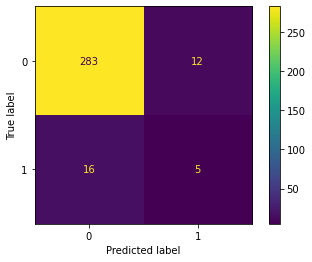

In [226]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test_n,y_test)

In [227]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       295
           1       0.29      0.24      0.26        21

    accuracy                           0.91       316
   macro avg       0.62      0.60      0.61       316
weighted avg       0.90      0.91      0.91       316



#### Model 3 : Bagging classifier using Naive Bayes

In [228]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB      

In [229]:
bagging_clf = BaggingClassifier(GaussianNB(),bootstrap = True, random_state = 7)
bagging_clf.fit(X_train_n,Y_train)

BaggingClassifier(base_estimator=GaussianNB(), random_state=7)

In [230]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train_n)
y_predict = bagging_clf.predict(x_test_n)

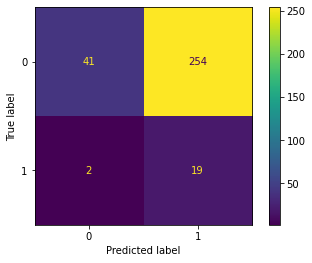

In [231]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test_n,y_test)

In [232]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.14      0.24       295
           1       0.07      0.90      0.13        21

    accuracy                           0.19       316
   macro avg       0.51      0.52      0.19       316
weighted avg       0.89      0.19      0.24       316



#### Model 4 :  AdaBoost Classifier using DT

In [233]:
from sklearn.ensemble import AdaBoostClassifier

In [234]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 22),random_state=18)
adaboost_clf.fit(X_train_n, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=22),
                   random_state=18)

In [235]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train_n)
y_predict = adaboost_clf.predict(x_test_n)

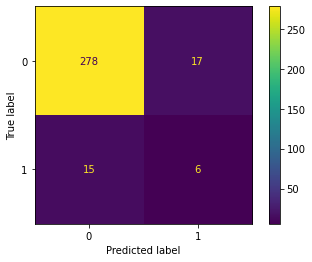

In [236]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test_n,y_test)

In [237]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       295
           1       0.26      0.29      0.27        21

    accuracy                           0.90       316
   macro avg       0.60      0.61      0.61       316
weighted avg       0.90      0.90      0.90       316



#### Model 5 : AdaBoost Classifier using Naive Bayes

In [238]:
from sklearn.ensemble import AdaBoostClassifier

In [239]:
adaboost_clf = AdaBoostClassifier(GaussianNB(),n_estimators=45,learning_rate=0.1,algorithm='SAMME.R')
adaboost_clf.fit(X_train_n, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.1,
                   n_estimators=45)

In [240]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train_n)
y_predict = adaboost_clf.predict(x_test_n)

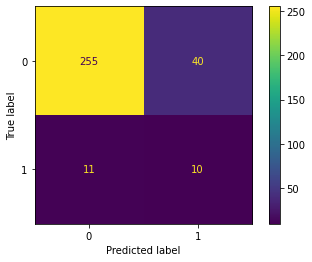

In [241]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test_n,y_test)

In [242]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       295
           1       0.20      0.48      0.28        21

    accuracy                           0.84       316
   macro avg       0.58      0.67      0.60       316
weighted avg       0.91      0.84      0.87       316



#### Model 6 : Gradient Boosting

In [243]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 15, random_state = 101,learning_rate=5)
gbrt.fit(X_train_n, Y_train)

GradientBoostingClassifier(learning_rate=5, max_depth=15, random_state=101)

In [244]:
# Predicting the output
Y_t_predict = gbrt.predict(X_train_n)
y_predict = gbrt.predict(x_test_n)

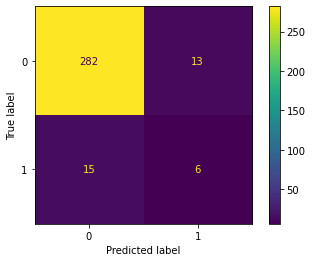

In [245]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(gbrt,x_test_n,y_test)

In [246]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       295
           1       0.32      0.29      0.30        21

    accuracy                           0.91       316
   macro avg       0.63      0.62      0.63       316
weighted avg       0.91      0.91      0.91       316



#### Model 7 : LightGBM

In [247]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.012, class_weight = {1:120,0:0.89}, n_estimators = 100
                           ,boosting_type = 'gbdt')
model.fit(X_train_n, Y_train)

LGBMClassifier(class_weight={0: 0.89, 1: 120}, learning_rate=0.012)

In [248]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.012, class_weight = {1:120,0:0.89}, n_estimators = 100
                           ,boosting_type = 'gbdt')
X = model.fit(X_train_n, Y_train)

In [249]:
# Predicting the output
Y_t_predict = model.predict(X_train_n)
y_predict = model.predict(x_test_n)

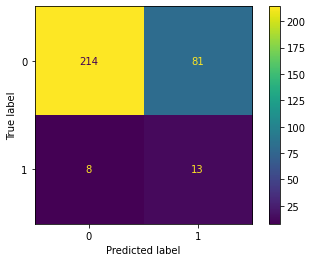

In [250]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model,x_test_n,y_test)

In [251]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       295
           1       0.14      0.62      0.23        21

    accuracy                           0.72       316
   macro avg       0.55      0.67      0.53       316
weighted avg       0.91      0.72      0.79       316



#### Model 8 : Naive Bayes 

In [252]:
from sklearn.naive_bayes import GaussianNB      
Gb = GaussianNB()
Gb.fit(X_train_n, Y_train) # Training the model
Y_t_predict = Gb.predict(X_train_n) # Predicting the Output 
y_predict = Gb.predict(x_test_n)

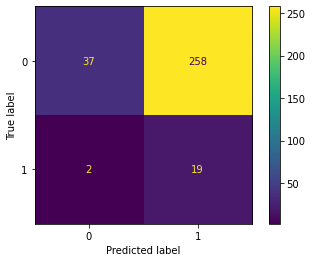

In [253]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Gb, x_test_n, y_test)

In [254]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.13      0.22       295
           1       0.07      0.90      0.13        21

    accuracy                           0.18       316
   macro avg       0.51      0.52      0.17       316
weighted avg       0.89      0.18      0.22       316



#### Model 9 : SVM

In [255]:
from sklearn.svm import SVC     
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

svc = SVC()     

# parameters = {'C': [0.1, 1, 10, 100, 1000],        
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  
#               'kernel': ['linear','rbf','poly'],
#                'random_state': [0,1,5,40,32]}

# model_svm = RandomizedSearchCV(svc,parameters,cv=3,scoring='accuracy', 
#                          verbose = 15, n_jobs = -1)
# model_svm.fit(X_train_n,Y_train)

In [256]:
# model_svm.best_params_

In [257]:
from sklearn.svm import SVC     
from sklearn import metrics
svc = SVC(kernel='rbf',C=1000,gamma=0.0001,random_state = 32)
svc.fit(X_train_n,Y_train)
Y_t_pred = svc.predict(X_train_n)
y_predict = svc.predict(x_test_n)

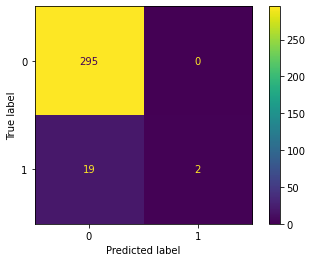

In [258]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, x_test_n, y_test)

In [259]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.10      0.17        21

    accuracy                           0.94       316
   macro avg       0.97      0.55      0.57       316
weighted avg       0.94      0.94      0.92       316



#### Model 10 : Handling class imbalance using EasyEnsembleClassifier based techniques

In [603]:
X_train_n.shape

(1261, 78)

In [261]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 225, sampling_strategy = {1:84 ,0:85},estimator = BaggingClassifier())
X_train_balanced = eec.fit(X_train_n, Y_train)
Y_t_predict = eec.predict(X_train_n)
y_pred = eec.predict(x_test_n)

In [262]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7692307692307693
0.7468354430379747


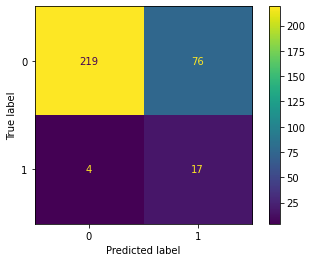

In [263]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_n, y_test)
confusion_mat
plt.show()

In [264]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       295
           1       0.18      0.81      0.30        21

    accuracy                           0.75       316
   macro avg       0.58      0.78      0.57       316
weighted avg       0.93      0.75      0.81       316



### Feature Selection - option 2

#### E) Recursive Feature Elimination

#### Model 1 : Recursive feature elimination by using Decision Tree 

In [265]:
X_train.shape

(1261, 188)

In [604]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

Dt = DecisionTreeClassifier(random_state = 0)
rfecv = RFECV(estimator = Dt, step = 1, scoring = 'recall', cv = 5, verbose = 2, n_jobs = -1)

In [605]:
rfecv.fit(X_train,Y_train)

Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
F

RFECV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
      scoring='recall', verbose=2)

In [606]:
len(rfecv.get_feature_names_out())

108

In [609]:
# Selected features
selected_features_rfecv_dt = rfecv.get_feature_names_out()
selected_features_rfecv_dt

array(['0', '1', '3', '4', '8', '9', '10', '11', '12', '15', '19', '20',
       '21', '22', '23', '24', '28', '29', '32', '33', '35', '37', '38',
       '39', '40', '41', '47', '53', '59', '71', '72', '75', '76', '77',
       '78', '79', '80', '81', '85', '93', '99', '107', '112', '115',
       '120', '125', '126', '129', '137', '138', '142', '143', '145',
       '153', '169', '180', '181', '182', '183', '184', '185', '195',
       '198', '210', '211', '212', '213', '214', '215', '216', '217',
       '218', '219', '221', '222', '223', '225', '227', '228', '238',
       '239', '244', '247', '248', '251', '253', '254', '255', '267',
       '268', '269', '367', '368', '432', '433', '482', '542', '546',
       '550', '551', '558', '559', '560', '562', '564', '565', '570',
       '571'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

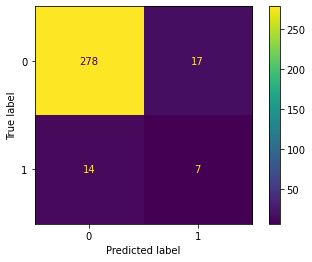

In [271]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(rfecv,x_test, y_test)
confusion_mat
plt.show()

In [272]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict1)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       295
           1       0.29      0.33      0.31        21

    accuracy                           0.90       316
   macro avg       0.62      0.64      0.63       316
weighted avg       0.91      0.90      0.90       316



In [273]:
X_train_trans = rfecv.transform(X_train)
x_test_trans = rfecv.transform(x_test)

#### Model 1A : Handling class imbalance using EasyEnsembleClassifier based techniques

In [397]:
X_train_trans.shape

(1261, 108)

In [442]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 215, sampling_strategy = {1:84 ,0:82},estimator = BaggingClassifier())
X_train_balanced = eec.fit(X_train_trans, Y_train)
Y_t_predict = eec.predict(X_train_trans)
y_pred = eec.predict(x_test_trans)

In [443]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7541633624107851
0.75


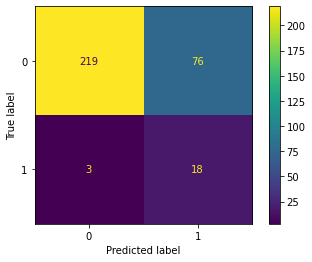

In [444]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans, y_test)
confusion_mat
plt.show()

In [445]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       295
           1       0.19      0.86      0.31        21

    accuracy                           0.75       316
   macro avg       0.59      0.80      0.58       316
weighted avg       0.93      0.75      0.81       316



#### Model 2 : Recursive feature by using AdaBoostClassifier(DecisionTreeClassifier())

In [612]:
X_train.shape

(1261, 188)

In [613]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 22),random_state=18)
rfecv = RFECV(estimator = adaboost_clf, step = 1, scoring = 'recall', cv = 5, verbose = 2, n_jobs = -1)

In [614]:
rfecv.fit(X_train,Y_train)

Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
F

RFECV(cv=5,
      estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=22),
                                   random_state=18),
      n_jobs=-1, scoring='recall', verbose=2)

In [615]:
# features selected
selected_features_rfecv_ada = rfecv.get_feature_names_out()
print(selected_features_rfecv_ada)
print('Total no. of features selected :',len(rfecv.get_feature_names_out()))

['10' '29' '40' '59' '71' '80' '99' '112' '120' '153' '169' '177' '214'
 '248' '253' '267' '269' '367' '433' '550' '571']
Total no. of features selected : 21


In [616]:
Y_t_pred = rfecv.predict(X_train)
y_predict = rfecv.predict(x_test)

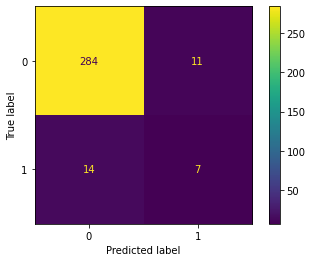

In [617]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(rfecv,x_test, y_test)
confusion_mat
plt.show()

In [284]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       295
           1       0.39      0.33      0.36        21

    accuracy                           0.92       316
   macro avg       0.67      0.65      0.66       316
weighted avg       0.92      0.92      0.92       316



#### Model 2A : Handling class imbalance using EasyEnsembleClassifier based techniques

In [285]:
X_train_trans1 = rfecv.transform(X_train)
x_test_trans1 = rfecv.transform(x_test)

In [286]:
X_train_trans1.shape

(1261, 21)

In [471]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 80, sampling_strategy = {1:84 ,0:80},estimator = AdaBoostClassifier(DecisionTreeClassifier()))
X_train_balanced = eec.fit(X_train_trans1, Y_train)
y_pred = eec.predict(x_test_trans1)
Y_t_predict = eec.predict(X_train_trans1)

In [473]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7367168913560667
0.7151898734177216


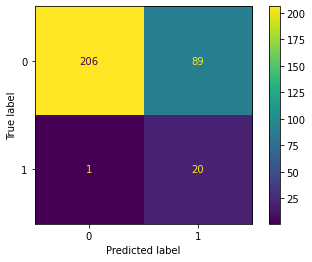

In [474]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans1, y_test)
confusion_mat
plt.show()

In [475]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       295
           1       0.18      0.95      0.31        21

    accuracy                           0.72       316
   macro avg       0.59      0.83      0.56       316
weighted avg       0.94      0.72      0.79       316



### Feature Selection - option 3

In [490]:
X_train.shape

(1261, 188)

#### F) Select From Model By Using LGBMClassifier

In [491]:
from sklearn.feature_selection import SelectFromModel
import lightgbm as lgb

sfm=SelectFromModel(lgb.LGBMClassifier(learning_rate = 0.012, class_weight = {1:120,0:0.89}, n_estimators = 100,boosting_type = 'gbdt'))
sfm.fit(X_train,Y_train)

SelectFromModel(estimator=LGBMClassifier(class_weight={0: 0.89, 1: 120},
                                         learning_rate=0.012))

In [492]:
feature_selected_sfm = X_train.columns[sfm.get_support()]
len(feature_selected_sfm)

61

In [493]:
feature_selected_sfm

Index(['0', '1', '3', '4', '9', '15', '19', '21', '33', '59', '71', '75', '76',
       '82', '83', '86', '88', '91', '92', '99', '100', '102', '103', '107',
       '108', '109', '129', '130', '138', '143', '145', '146', '160', '162',
       '163', '180', '183', '184', '195', '211', '213', '215', '216', '219',
       '238', '244', '250', '253', '269', '316', '419', '433', '468', '489',
       '510', '511', '550', '551', '559', '586', '587'],
      dtype='object')

In [494]:
X_train_final_ = X_train[feature_selected_sfm]
x_test_final_ = x_test[feature_selected_sfm]

In [495]:
X_train_final_.shape

(1261, 61)

#### Model 1 : Decision Tree

In [496]:
# Hypertuning
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8,16],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'random_state' : [0,1,34,43,42]}

# Hyptuned_model = GridSearchCV(Dt,cv = 10, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train_final_, Y_train)

In [497]:
# Hyptuned_model.best_params_

In [498]:
Dt.set_params(criterion ='entropy',
max_depth = 18,
max_features = 'auto',
random_state = 43)
# class_weight = {1:150, 0:0.89})

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='auto',
                       random_state=43)

In [499]:
Dt.fit(X_train_final_,Y_train) # Fitting the model
Y_t_predict = Dt.predict(X_train_final_) # Predecting Y_train
y_predict = Dt.predict(x_test_final_) # Predecting Y_train

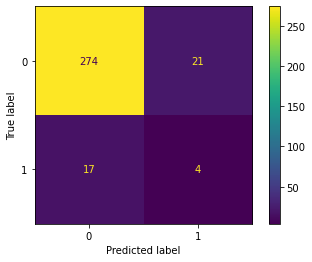

In [500]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(Dt,x_test_final_, y_test)
confusion_mat
plt.show()

In [501]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       295
           1       0.16      0.19      0.17        21

    accuracy                           0.88       316
   macro avg       0.55      0.56      0.55       316
weighted avg       0.89      0.88      0.88       316



#### Model 2 : Bagging classifier using decision tree

In [502]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [503]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 15), random_state = 1,bootstrap=False,n_jobs=-1)
bagging_clf.fit(X_train_final_,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        random_state=42),
                  bootstrap=False, n_jobs=-1, random_state=1)

In [504]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train_final_)
y_predict = bagging_clf.predict(x_test_final_)

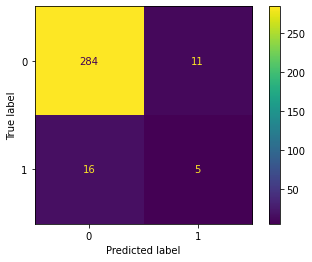

In [505]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test_final_,y_test)

In [506]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       295
           1       0.31      0.24      0.27        21

    accuracy                           0.91       316
   macro avg       0.63      0.60      0.61       316
weighted avg       0.90      0.91      0.91       316



#### Model 3 : Bagging classifier using Naive Bayes

In [507]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB      

In [508]:
bagging_clf = BaggingClassifier(GaussianNB(),bootstrap = False, random_state = 7)
bagging_clf.fit(X_train_final_,Y_train)

BaggingClassifier(base_estimator=GaussianNB(), bootstrap=False, random_state=7)

In [509]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train_final_)
y_predict = bagging_clf.predict(x_test_final_)

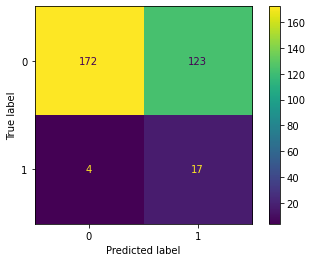

In [510]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test_final_,y_test)

In [511]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.98      0.58      0.73       295
           1       0.12      0.81      0.21        21

    accuracy                           0.60       316
   macro avg       0.55      0.70      0.47       316
weighted avg       0.92      0.60      0.70       316



#### Model 4 :  AdaBoost Classifier using DT

In [512]:
from sklearn.ensemble import AdaBoostClassifier

In [513]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 22),random_state=18)
adaboost_clf.fit(X_train_final_, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=22),
                   random_state=18)

In [514]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train_final_)
y_predict = adaboost_clf.predict(x_test_final_)

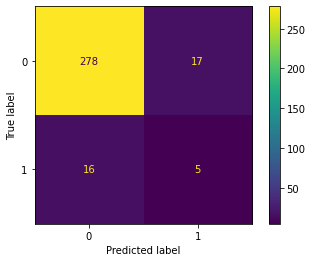

In [515]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test_final_,y_test)

In [516]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       295
           1       0.23      0.24      0.23        21

    accuracy                           0.90       316
   macro avg       0.59      0.59      0.59       316
weighted avg       0.90      0.90      0.90       316



#### Model 5 : AdaBoost Classifier using Naive Bayes

In [517]:
from sklearn.ensemble import AdaBoostClassifier

In [518]:
adaboost_clf = AdaBoostClassifier(GaussianNB(),n_estimators=45,learning_rate=0.1,algorithm='SAMME.R')
adaboost_clf.fit(X_train_final_, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.1,
                   n_estimators=45)

In [519]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train_final_)
y_predict = adaboost_clf.predict(x_test_final_)

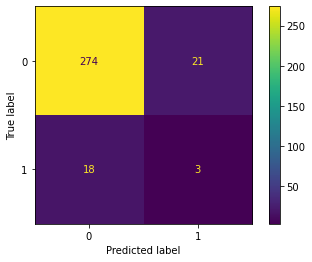

In [520]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test_final_,y_test)

In [521]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       295
           1       0.12      0.14      0.13        21

    accuracy                           0.88       316
   macro avg       0.53      0.54      0.53       316
weighted avg       0.88      0.88      0.88       316



#### Model 6 : Gradient Boosting

In [522]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 15, random_state = 101,learning_rate=5)
gbrt.fit(X_train_final_, Y_train)

GradientBoostingClassifier(learning_rate=5, max_depth=15, random_state=101)

In [523]:
# Predicting the output
Y_t_predict = gbrt.predict(X_train_final_)
y_predict = gbrt.predict(x_test_final_)

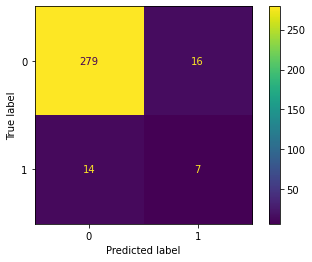

In [524]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(gbrt,x_test_final_,y_test)

In [525]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       295
           1       0.30      0.33      0.32        21

    accuracy                           0.91       316
   macro avg       0.63      0.64      0.63       316
weighted avg       0.91      0.91      0.91       316



#### Model 7 : LightGBM

In [526]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.012, class_weight = {1:120,0:0.89}, n_estimators = 100
                           ,boosting_type = 'gbdt')
model.fit(X_train_final_, Y_train)

LGBMClassifier(class_weight={0: 0.89, 1: 120}, learning_rate=0.012)

In [527]:
# Predicting the output
Y_t_predict = model.predict(X_train_final_)
y_predict = model.predict(x_test_final_)

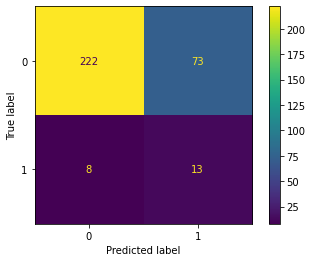

In [528]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model,x_test_final_,y_test)

In [529]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       295
           1       0.15      0.62      0.24        21

    accuracy                           0.74       316
   macro avg       0.56      0.69      0.54       316
weighted avg       0.91      0.74      0.81       316



#### Model 8 : Naive Bayes 

In [530]:
from sklearn.naive_bayes import GaussianNB      
Gb = GaussianNB()
Gb.fit(X_train_final_, Y_train) # Training the model
Y_t_predict = Gb.predict(X_train_final_) # Predicting the Output 
y_predict = Gb.predict(x_test_final_)

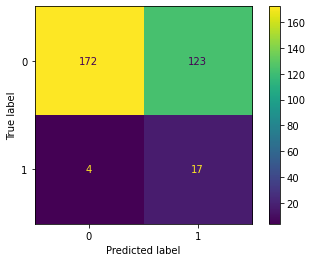

In [531]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Gb, x_test_final_, y_test)

In [532]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.98      0.58      0.73       295
           1       0.12      0.81      0.21        21

    accuracy                           0.60       316
   macro avg       0.55      0.70      0.47       316
weighted avg       0.92      0.60      0.70       316



#### Model 9 : SVM

In [533]:
# Scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_final_ = ss.fit_transform(X_train_final_)   
x_test_final_ = ss.transform(x_test_final_)

In [534]:
from sklearn.svm import SVC     
from sklearn import metrics
svc = SVC(kernel='rbf',C=200,gamma=0.12,random_state = 5)
svc.fit(X_train_final_,Y_train)
Y_t_pred = svc.predict(X_train_final_)
y_predict = svc.predict(x_test_final_)

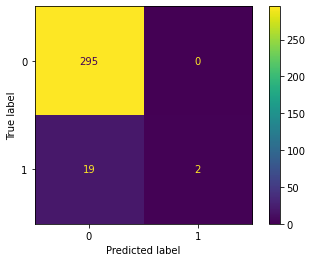

In [535]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, x_test_final_, y_test)

In [536]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.10      0.17        21

    accuracy                           0.94       316
   macro avg       0.97      0.55      0.57       316
weighted avg       0.94      0.94      0.92       316



#### Model 10 : Handling class imbalance using EasyEnsembleClassifier based techniques

In [538]:
X_train_trans_ = sfm.transform(X_train)
x_test_trans_ = sfm.transform(x_test)

In [539]:
X_train_trans_.shape

(1261, 61)

In [540]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 225, sampling_strategy = {1:84 ,0:85},estimator = GradientBoostingClassifier())
X_train_balanced = eec.fit(X_train_trans_, Y_train)
Y_t_predict = eec.predict(X_train_trans_)
y_pred = eec.predict(x_test_trans_)

In [541]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7597145122918318
0.7341772151898734


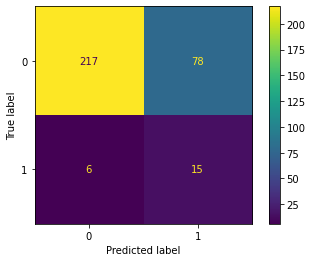

In [542]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans_, y_test)
confusion_mat
plt.show()

In [543]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       295
           1       0.16      0.71      0.26        21

    accuracy                           0.73       316
   macro avg       0.57      0.72      0.55       316
weighted avg       0.92      0.73      0.80       316



#### G) Select From Model  By Using GradientBoostingClassifier

In [544]:
X_train.shape

(1261, 188)

In [545]:
from sklearn.feature_selection import SelectFromModel

sfm=SelectFromModel(GradientBoostingClassifier(max_depth = 15, random_state = 101,learning_rate=5))
sfm.fit(X_train,Y_train)

SelectFromModel(estimator=GradientBoostingClassifier(learning_rate=5,
                                                     max_depth=15,
                                                     random_state=101))

In [546]:
feature_selected_sfm = X_train.columns[sfm.get_support()]
len(feature_selected_sfm)

56

In [547]:
feature_selected_sfm

Index(['0', '1', '10', '23', '28', '29', '38', '40', '59', '71', '72', '77',
       '80', '83', '86', '92', '93', '99', '107', '112', '114', '119', '120',
       '128', '138', '143', '144', '145', '153', '161', '169', '181', '198',
       '211', '215', '223', '238', '244', '248', '251', '253', '254', '255',
       '267', '268', '269', '345', '367', '385', '482', '489', '550', '558',
       '571', '573', '583'],
      dtype='object')

In [548]:
X_train_final = X_train[feature_selected_sfm]
x_test_final = x_test[feature_selected_sfm]

#### Model 1 : Decision Tree

In [350]:
# Hypertuning
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

# from sklearn.model_selection import GridSearchCV
# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth' : [3,4,5,8,16],
#               'max_features' : ['auto', 'sqrt', 'log2', None],
#               'random_state' : [0,1,34,43,42]}

# Hyptuned_model = GridSearchCV(Dt,cv = 10, param_grid = param_dict, verbose = 15, n_jobs = -1)
# Hyptuned_model.fit(X_train_final, Y_train)

In [351]:
# Hyptuned_model.best_params_

In [352]:
Dt.set_params(criterion ='gini',
max_depth = 18,
max_features = 'auto',
random_state = 34)
# class_weight = {1:150, 0:0.89})

DecisionTreeClassifier(max_depth=18, max_features='auto', random_state=34)

In [353]:
Dt.fit(X_train_final,Y_train) # Fitting the model
Y_t_predict = Dt.predict(X_train_final) # Predecting Y_train
y_predict = Dt.predict(x_test_final) # Predecting Y_train

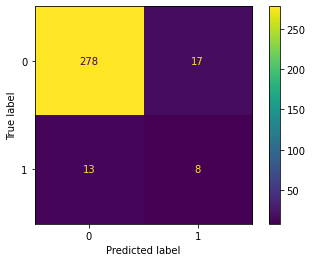

In [354]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(Dt,x_test_final, y_test)
confusion_mat
plt.show()

In [355]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       295
           1       0.32      0.38      0.35        21

    accuracy                           0.91       316
   macro avg       0.64      0.66      0.65       316
weighted avg       0.91      0.91      0.91       316



#### Model 2 : Bagging classifier using decision tree

In [356]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [357]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42, max_depth = 15), random_state = 1,bootstrap=False,n_jobs=-1)
bagging_clf.fit(X_train_final,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        random_state=42),
                  bootstrap=False, n_jobs=-1, random_state=1)

In [358]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train_final)
y_predict = bagging_clf.predict(x_test_final)

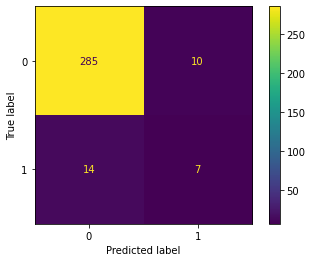

In [359]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test_final,y_test)

In [360]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       295
           1       0.41      0.33      0.37        21

    accuracy                           0.92       316
   macro avg       0.68      0.65      0.66       316
weighted avg       0.92      0.92      0.92       316



#### Model 3 : Bagging classifier using Naive Bayes

In [361]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB      

In [362]:
bagging_clf = BaggingClassifier(GaussianNB(),bootstrap = False, random_state = 7)
bagging_clf.fit(X_train_final,Y_train)

BaggingClassifier(base_estimator=GaussianNB(), bootstrap=False, random_state=7)

In [363]:
# Predicting the output
Y_t_predict = bagging_clf.predict(X_train_final)
y_predict = bagging_clf.predict(x_test_final)

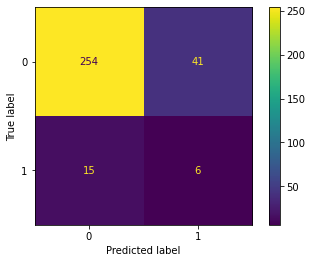

In [364]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(bagging_clf,x_test_final,y_test)

In [365]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       295
           1       0.13      0.29      0.18        21

    accuracy                           0.82       316
   macro avg       0.54      0.57      0.54       316
weighted avg       0.89      0.82      0.85       316



#### Model 4 :  AdaBoost Classifier using DT

In [366]:
from sklearn.ensemble import AdaBoostClassifier

In [367]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 22),random_state=18)
adaboost_clf.fit(X_train_final, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=22),
                   random_state=18)

In [368]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train_final)
y_predict = adaboost_clf.predict(x_test_final)

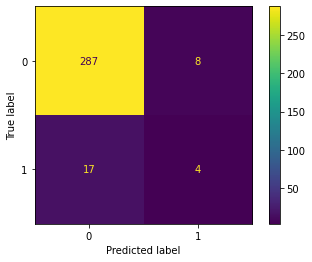

In [369]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test_final,y_test)

In [370]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       295
           1       0.33      0.19      0.24        21

    accuracy                           0.92       316
   macro avg       0.64      0.58      0.60       316
weighted avg       0.90      0.92      0.91       316



#### Model 5 : AdaBoost Classifier using Naive Bayes

In [371]:
from sklearn.ensemble import AdaBoostClassifier

In [372]:
adaboost_clf = AdaBoostClassifier(GaussianNB(),n_estimators=45,learning_rate=0.1,algorithm='SAMME.R')
adaboost_clf.fit(X_train_final, Y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.1,
                   n_estimators=45)

In [373]:
# Predicting the output
Y_t_predict = adaboost_clf.predict(X_train_final)
y_predict = adaboost_clf.predict(x_test_final)

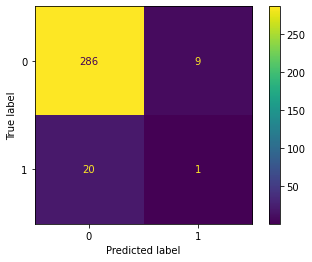

In [374]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(adaboost_clf,x_test_final,y_test)

In [375]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       295
           1       0.10      0.05      0.06        21

    accuracy                           0.91       316
   macro avg       0.52      0.51      0.51       316
weighted avg       0.88      0.91      0.89       316



#### Model 6 : Gradient Boosting

In [376]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth = 15, random_state = 101,learning_rate=5)
gbrt.fit(X_train_final, Y_train)

GradientBoostingClassifier(learning_rate=5, max_depth=15, random_state=101)

In [377]:
# Predicting the output
Y_t_predict = gbrt.predict(X_train_final)
y_predict = gbrt.predict(x_test_final)

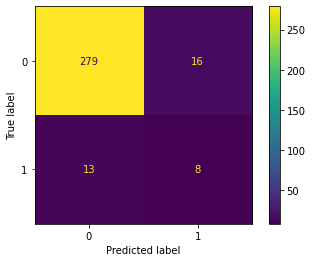

In [378]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(gbrt,x_test_final,y_test)

In [379]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       295
           1       0.33      0.38      0.36        21

    accuracy                           0.91       316
   macro avg       0.64      0.66      0.65       316
weighted avg       0.91      0.91      0.91       316



#### Model 7 : LightGBM

In [380]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate = 0.012, class_weight = {1:120,0:0.89}, n_estimators = 100
                           ,boosting_type = 'gbdt')
model.fit(X_train_final, Y_train)

LGBMClassifier(class_weight={0: 0.89, 1: 120}, learning_rate=0.012)

In [381]:
# Predicting the output
Y_t_predict = model.predict(X_train_final)
y_predict = model.predict(x_test_final)

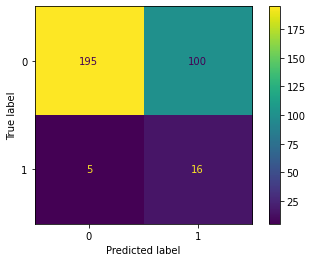

In [382]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
plot_confusion_matrix(model,x_test_final,y_test)

In [383]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.97      0.66      0.79       295
           1       0.14      0.76      0.23        21

    accuracy                           0.67       316
   macro avg       0.56      0.71      0.51       316
weighted avg       0.92      0.67      0.75       316



#### Model 8 : Naive Bayes 

In [384]:
from sklearn.naive_bayes import GaussianNB      
Gb = GaussianNB()
Gb.fit(X_train_final, Y_train) # Training the model
Y_t_predict = Gb.predict(X_train_final) # Predicting the Output 
y_predict = Gb.predict(x_test_final)

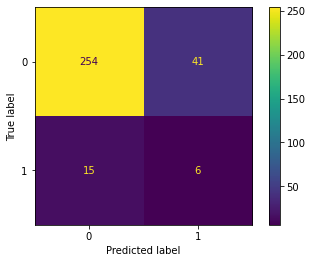

In [385]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Gb, x_test_final, y_test)

In [386]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       295
           1       0.13      0.29      0.18        21

    accuracy                           0.82       316
   macro avg       0.54      0.57      0.54       316
weighted avg       0.89      0.82      0.85       316



#### Model 9 : SVM

In [387]:
# Scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_final = ss.fit_transform(X_train_final)   
x_test_final = ss.transform(x_test_final)

In [388]:
from sklearn.svm import SVC     
from sklearn import metrics
svc = SVC(kernel='rbf',C=200,gamma=0.12,random_state = 5)
svc.fit(X_train_final,Y_train)
Y_t_pred = svc.predict(X_train_final)
y_predict = svc.predict(x_test_final)

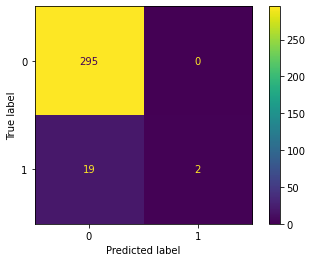

In [389]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, x_test_final, y_test)

In [390]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_predict)
print(classf_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.10      0.17        21

    accuracy                           0.94       316
   macro avg       0.97      0.55      0.57       316
weighted avg       0.94      0.94      0.92       316



#### Model 10 : Handling class imbalance using EasyEnsembleClassifier based techniques

In [391]:
X_train_final.shape

(1261, 56)

In [392]:
X_train_trans_1 = sfm.transform(X_train)
x_test_trans_1 = sfm.transform(x_test)

In [393]:
X_train_trans_1.shape

(1261, 56)

In [590]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 120, sampling_strategy = {1:84 ,0:85},estimator = GradientBoostingClassifier())
X_train_balanced = eec.fit(X_train_trans_1, Y_train)
Y_t_predict = eec.predict(X_train_trans_1)
y_pred = eec.predict(x_test_trans_1)

In [591]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7454401268834259
0.7436708860759493


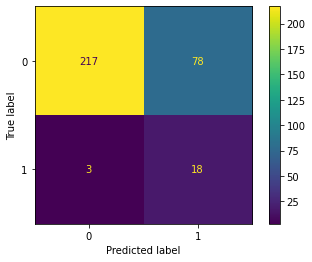

In [592]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans_1, y_test)
confusion_mat
plt.show()

In [594]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       295
           1       0.19      0.86      0.31        21

    accuracy                           0.74       316
   macro avg       0.59      0.80      0.58       316
weighted avg       0.93      0.74      0.81       316



### Selecting the algorithms having Recall for class one above 80% and for class zero above 70%

### Option 1: Forward Feature Selection Technique

#### Handling class imbalance using EasyEnsembleClassifier based techniques

In [260]:
X_train_n.shape

(1261, 78)

In [261]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 225, sampling_strategy = {1:84 ,0:85},estimator = BaggingClassifier())
X_train_balanced = eec.fit(X_train_n, Y_train)
Y_t_predict = eec.predict(X_train_n)
y_pred = eec.predict(x_test_n)

In [262]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7692307692307693
0.7468354430379747


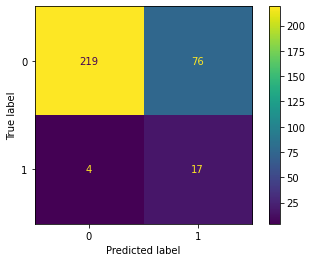

In [263]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_n, y_test)
confusion_mat
plt.show()

In [264]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       295
           1       0.18      0.81      0.30        21

    accuracy                           0.75       316
   macro avg       0.58      0.78      0.57       316
weighted avg       0.93      0.75      0.81       316



##### Selected features

In [599]:
selected_features

array(['0', '1', '3', '4', '8', '9', '10', '11', '12', '15', '20', '21',
       '22', '23', '24', '28', '29', '32', '33', '35', '37', '38', '40',
       '41', '47', '59', '71', '72', '75', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '91', '92', '93',
       '95', '99', '100', '102', '103', '107', '108', '109', '112', '113',
       '114', '115', '116', '117', '118', '119', '120', '125', '126',
       '130', '134', '136', '137', '138', '142', '143', '144', '145',
       '146', '151', '153', '155', '162'], dtype='<U3')

##### Observations :

### Option 2  - Recursive Feature Elimination By Using Decision Tree 

In [618]:
X_train_trans.shape

(1261, 108)

####  Handling class imbalance using EasyEnsembleClassifier based techniques (Model 1A)

In [442]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 215, sampling_strategy = {1:84 ,0:82},estimator = BaggingClassifier())
X_train_balanced = eec.fit(X_train_trans, Y_train)
Y_t_predict = eec.predict(X_train_trans)
y_pred = eec.predict(x_test_trans)

In [443]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7541633624107851
0.75


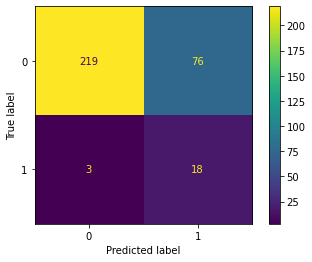

In [444]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans, y_test)
confusion_mat
plt.show()

In [445]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       295
           1       0.19      0.86      0.31        21

    accuracy                           0.75       316
   macro avg       0.59      0.80      0.58       316
weighted avg       0.93      0.75      0.81       316



##### Selected features

In [610]:
selected_features_rfecv_dt

array(['0', '1', '3', '4', '8', '9', '10', '11', '12', '15', '19', '20',
       '21', '22', '23', '24', '28', '29', '32', '33', '35', '37', '38',
       '39', '40', '41', '47', '53', '59', '71', '72', '75', '76', '77',
       '78', '79', '80', '81', '85', '93', '99', '107', '112', '115',
       '120', '125', '126', '129', '137', '138', '142', '143', '145',
       '153', '169', '180', '181', '182', '183', '184', '185', '195',
       '198', '210', '211', '212', '213', '214', '215', '216', '217',
       '218', '219', '221', '222', '223', '225', '227', '228', '238',
       '239', '244', '247', '248', '251', '253', '254', '255', '267',
       '268', '269', '367', '368', '432', '433', '482', '542', '546',
       '550', '551', '558', '559', '560', '562', '564', '565', '570',
       '571'], dtype=object)

##### Observations :

### Option 3  - Recursive Feature Elimination  By Using AdaBoostClassifier(DecisionTreeClassifier())

In [285]:
X_train_trans1 = rfecv.transform(X_train)
x_test_trans1 = rfecv.transform(x_test)

In [286]:
X_train_trans1.shape

(1261, 21)

####  Handling class imbalance using EasyEnsembleClassifier based techniques (Model 2A)

In [471]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 80, sampling_strategy = {1:84 ,0:80},estimator = AdaBoostClassifier(DecisionTreeClassifier()))
X_train_balanced = eec.fit(X_train_trans1, Y_train)
y_pred = eec.predict(x_test_trans1)
Y_t_predict = eec.predict(X_train_trans1)

In [473]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7367168913560667
0.7151898734177216


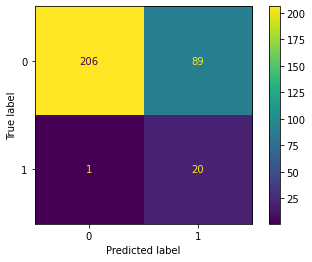

In [474]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans1, y_test)
confusion_mat
plt.show()

In [475]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       295
           1       0.18      0.95      0.31        21

    accuracy                           0.72       316
   macro avg       0.59      0.83      0.56       316
weighted avg       0.94      0.72      0.79       316



##### Selected features

In [619]:
selected_features_rfecv_ada

array(['10', '29', '40', '59', '71', '80', '99', '112', '120', '153',
       '169', '177', '214', '248', '253', '267', '269', '367', '433',
       '550', '571'], dtype=object)

##### Observations :

### Option 4  - Select From Model By using GradientBoostingClassifier

####  Handling class imbalance using EasyEnsembleClassifier based techniques

In [391]:
X_train_final.shape

(1261, 56)

In [392]:
X_train_trans_1 = sfm.transform(X_train)
x_test_trans_1 = sfm.transform(x_test)

In [393]:
X_train_trans_1.shape

(1261, 56)

In [590]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators = 120, sampling_strategy = {1:84 ,0:85},estimator = GradientBoostingClassifier())
X_train_balanced = eec.fit(X_train_trans_1, Y_train)
Y_t_predict = eec.predict(X_train_trans_1)
y_pred = eec.predict(x_test_trans_1)

In [591]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_t_predict))
print(accuracy_score(y_test,y_pred))

0.7454401268834259
0.7436708860759493


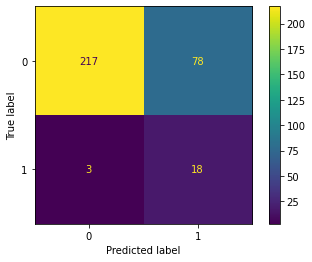

In [592]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_mat = plot_confusion_matrix(eec,x_test_trans_1, y_test)
confusion_mat
plt.show()

In [594]:
from sklearn.metrics import classification_report
classf_report = classification_report(y_test,y_pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       295
           1       0.19      0.86      0.31        21

    accuracy                           0.74       316
   macro avg       0.59      0.80      0.58       316
weighted avg       0.93      0.74      0.81       316



##### Observations :

### Conclusion:

- From above it can be seen that option 3 is performing good; with higest recall value of 0.95 for class-1, 
- No. of selected features - 21 nos.


- Option 2 is also performing good; with recall value of 0.86 for class-1
- No. of selected features - 108 nos.